In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# grhpviz
from sklearn.tree import export_graphviz

import graphviz


# 기계 학습 모델 필요 모듈
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline

matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [15]:
df_raw = pd.read_csv("Data/유방암.csv", encoding="cp949")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [16]:
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [17]:
# 목표변수값 0과 1로 만들기
df_raw["diagnosis"] = np.where(df_raw['diagnosis']== "양성", 1, 0)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [18]:
# 이산형 데이터가 없으므로 더미데이터 생성 X
# df_raw_dummy = pd.get_dummies(df_raw)
# df_raw_dummy.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [20]:
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis", axis=1, inplace = False)

In [21]:
# train_test_split (6:으로 트레인과 테스트 데이터가 나눠진다.)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, 
                                                                test_size=0.4, random_state=1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (192, 30)
train data Y size: (192,)
test data X size: (128, 30)
test data Y size: (128,)


In [22]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))

#test데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.883


- 트레이닝 데이터에 대해 과적합이 되어있다. 따라서 이를 하이퍼 파라미터 튜닝을 통해 조절해줘야 한다.

## 2. 하이퍼파라미터 튜닝

### Max Depth

In [23]:
train_score = []; test_score = []

para_depth = [depth for depth in range(1, 10)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["MaxDepth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

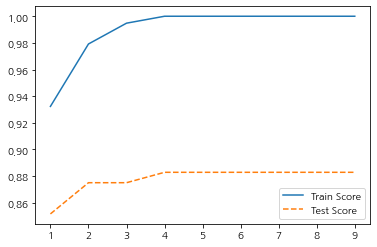

In [24]:
plt.plot(para_depth, train_score, linestyle="-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle="--", label = "Test Score")
plt.legend()

In [26]:
df_score_depth.round(3)

,MaxDepth,TrainScore,TestScore
0,1,0.932,0.852
1,2,0.979,0.875
2,3,0.995,0.875
3,4,1.000,0.883
4,5,1.000,0.883
5,6,1.000,0.883
6,7,1.000,0.883
7,8,1.000,0.883
8,9,1.000,0.883


- Maxdepth는 4로 선정하도록 한다. 데이터의 크기를 어느정도 고려할 때 4가 적합해보인다고 생각한다. 트레이닝 데이터에 대한 과적합은 leaf나, split을 통해 어느정도 잡도록 한다.

###  min_samples_split

In [33]:
train_score = []; test_score = []
para_split = [n_leaf * 10 for n_leaf in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth=4,
                                 min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [34]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,10,0.995,0.875
1,20,0.995,0.875
2,30,0.995,0.875
3,40,0.995,0.875
4,50,0.995,0.875
5,60,0.995,0.875
6,70,0.995,0.875
7,80,0.984,0.867
8,90,0.953,0.844
9,100,0.953,0.844


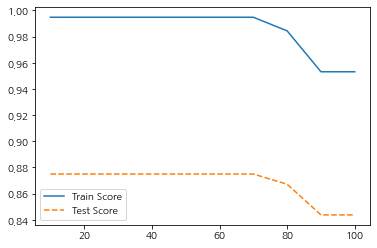

In [35]:
plt.plot(para_split, train_score, linestyle="-", label = "Train Score")
plt.plot(para_split, test_score, linestyle="--", label = "Test Score")
plt.legend()

- split 하이퍼 파리미터는 20정도로 정하도록 하겠다.

In [36]:
train_score = []; test_score = []

para_leaf = [n_leaf * 2 for n_leaf in range(1, 11)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234, min_samples_leaf=v_min_samples_leaf, 
                                 max_depth=4, min_samples_split=20)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))df_score_leaf.round(3)
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSampleLeaf"] = para_leaf
df_score_leaf["TrainAccuracy"] = train_score
df_score_leaf["TestAccuracy"] = test_score

In [37]:
df_score_leaf.round(3)

,MinSampleLeaf,TrainAccuracy,TestAccuracy
0,2,0.995,0.875
1,4,0.974,0.891
2,6,0.964,0.875
3,8,0.958,0.898
4,10,0.953,0.914
5,12,0.943,0.906
6,14,0.932,0.898
7,16,0.932,0.852
8,18,0.932,0.852
9,20,0.932,0.852


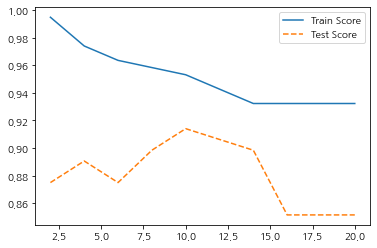

In [38]:
plt.plot(para_leaf, train_score, linestyle="-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label = "Test Score")
plt.legend()

- Leaf 하이퍼 파라미터의 값은 10으로 정하도록 하겠다. 

### 최종 하이퍼 파리미터 결과
    - MaxDepth = 4
    - min_samples_split = 20
    - min_samples_leaf = 10

In [40]:
tree_final = DecisionTreeClassifier(min_samples_leaf= 10, min_samples_split=20, 
                                   max_depth=4,random_state=1234)
tree_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Accuracy on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
#test데이터 설명력
print("Accuracy on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Accuracy on training set: 0.953
Accuracy on test set: 0.914


- 하이퍼파라미터 튜닝의 결과 트레이닝 셋의 과적합이 줄었고, 테스트 셋의 점수 또한 상승하는 결과를 보여준다.

### 최종 모델 시각화

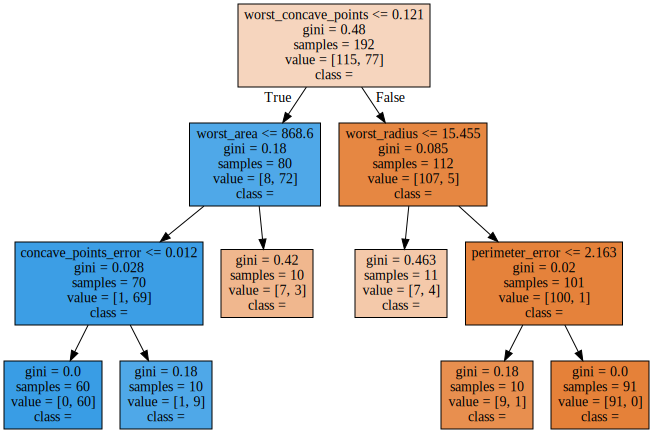

In [42]:
v_feature_name = df_train_x.columns

## Tree 구조 생성 및 저장: 모델 시각화
tree_graph = tree_final
tree_graph.fit(df_train_x, df_train_y)

# class 이름을 추가 
export_graphviz(tree_graph, out_file = "tree_final.dot", class_names=["양성", "음성"],
                feature_names = v_feature_name,
                impurity=True, filled = True) # filled 색으로 영향력 표시

with open("tree_final.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

### 최종모델 평가
- 트리 분리에 가장 큰 영향을 미치는 변수는 worst_conacve_points, worst_area, worst_radius라고 할 수 있다.
    - worst concave points: (세포)최대 오목한 점의 수
    - worst area: (세포)최대 면적
    - worst radius	(세포)최대 반경

- 최대 오목한 점의 수가 <= 0.121이면 음성이고, 0.121 이상이면 양성이다.

- 오목한 점의 수 >= 0.121 & 최대 반경 <=15.455이면 지니계수가 0.02 정도로 낮아진다.
    - 자료수 = samples101, gini지수 = 0.02
   
   
- 유방암이 의심가는 환자가 있을 때, 세포의 최대 오목한 점의 수와 최대반경을 확인해서 양성을 판단할 수 있다고 할 수 있다.

### 최종 모델을 이용한 분류 예측 및 중요 변수 선정

In [47]:
y_pred = tree_final.predict(df_test_x)

print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy:0.914

Confusion Matrix: 
[[94  3]
 [ 8 23]]


-  최종 모델의 정확도는 91.4%이다.

In [45]:
df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
27,worst_concave_points,0.861
23,worst_area,0.104
20,worst_radius,0.031
12,perimeter_error,0.002
17,concave_points_error,0.002
0,mean_radius,0.000
16,concavity_error,0.000
28,worst_symmetry,0.000
26,worst_concavity,0.000
25,worst_compactness,0.000


Text(0, 0.5, '변수')

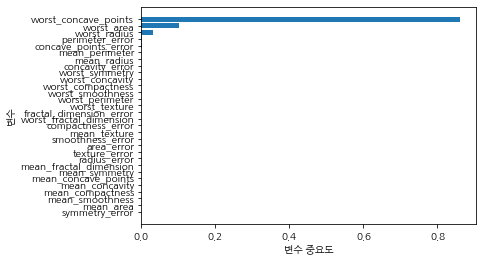

In [46]:
df_importance.sort_values("Importance", ascending= True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

- 중요도가 높은 변수는 worst_conacve_points, worst_area, worst_radius라고 결과가 나왔다.
- 이는 트리의 그래프를 분류하는데 영향을 끼쳤던 변수들이다.

- 따라서 유방암 데이터의 양성과 음성을 구분하는 데에는 해당 데이터들을 사용하면 된다.